### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

15                Belarus
98              Lithuania
3                 Andorra
68                Grenada
45         Czech Republic
61                 France
141    Russian Federation
81                Ireland
155              Slovakia
99             Luxembourg
Name: country, dtype: object

Birra:  106.16062176165804

Vino:  49.45077720207254

Distillati:  80.99481865284974

Max alcohol index:  231.66666666666666
3    Andorra
Name: country, dtype: object
3    Andorra
Name: country, dtype: object

Solo paesi con piu di 100 birre:
                country  beer_servings
3              Andorra            245
4               Angola            217
5    Antigua & Barbuda            102
6            Argentina            193
8            Australia            261
..                 ...            ...
182     United Kingdom            219
184                USA            249
185            Uruguay            115
188          Venezuela            333
189            Vietnam            111

[79 rows 

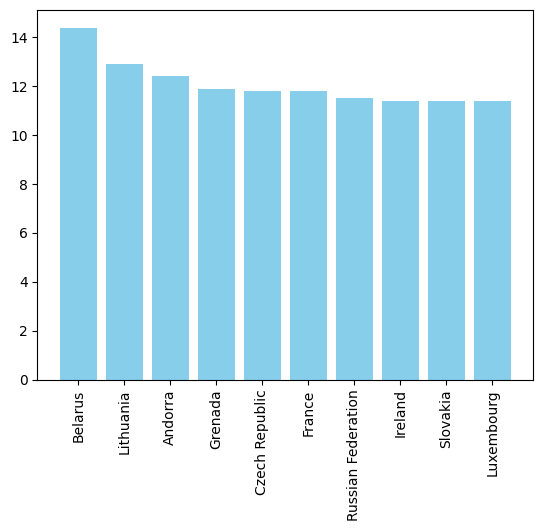

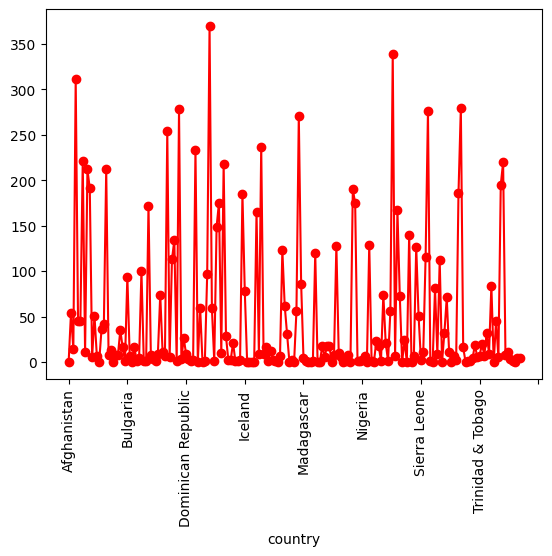

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # si importa con il l'alias plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
#print(df.head())

litri = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
print(litri['country'])


print("\nBirra: ",df['beer_servings'].mean())
print("\nVino: ",df['wine_servings'].mean())
print("\nDistillati: ",df['spirit_servings'].mean())

df['alcohol_index'] = ((df.beer_servings + df.wine_servings + df.spirit_servings) / 3)
#print(df.head())

print("\nMax alcohol index: ",df['alcohol_index'].max())#non voleva questo
#ma questo :
print(df.sort_values('alcohol_index', ascending=False).head(1).country)
#oppure
a = df.sort_values('alcohol_index', ascending=False).head(1)
print(a['country'])

birre = df[df['beer_servings'] > 100]
print("\nSolo paesi con piu di 100 birre:\n",birre[['country','beer_servings' ]])


plt.bar(litri['country'], litri['total_litres_of_pure_alcohol'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

#oppure
#plt.figure(figsize=(10, 5))
#plt.bar(litri['country'], litri['total_litres_of_pure_alcohol'], color='skyblue')
#plt.title("Top 10 Countries by Alcohol Consumption")
#plt.xticks(rotation=90)
#plt.show()



#plt.figure(figsize=(12, 5))
df.sort_values('country').plot(x='country', y='wine_servings', kind='line', marker='o', color='red', legend=False)
plt.xticks(rotation=90)
#plt.title("Wine Servings by Country (Sorted)")
plt.show()

Andorra
3    Andorra
Name: country, dtype: object


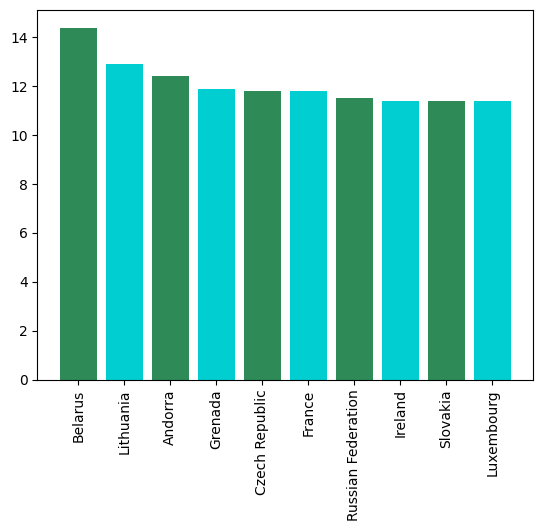

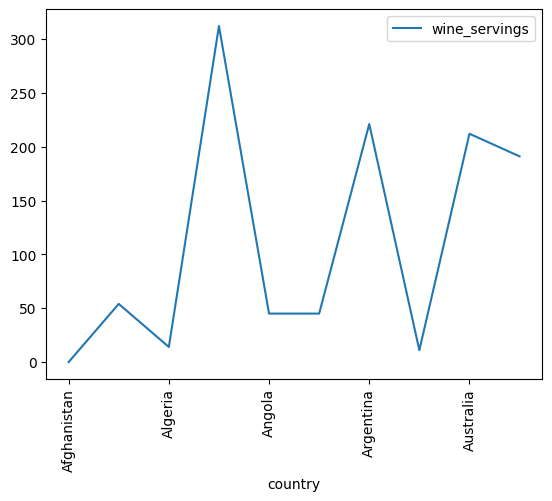

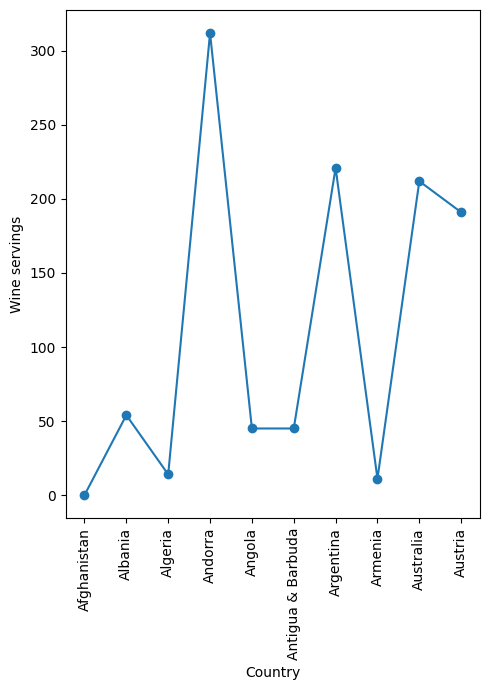

In [4]:
#variante uni
import pandas as pd
import matplotlib.pyplot as plt  # si importa con il l'alias plt
import matplotlib.colors as mcolors

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
#print(df.head())
df['alcohol_index'] = ((df.beer_servings + df.wine_servings + df.spirit_servings) / 3)
primi_10 = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)

print(df.country[df['alcohol_index'].idxmax()])

print(df.sort_values('alcohol_index', ascending=False).head(1).country)

df[df['alcohol_index'] == df['alcohol_index'].max()] #in caso diverse nazione massimo consumo convinee questa, perche le torna tutte

df[df['beer_servings'] > 100].sort_values('beer_servings', ascending=True) #ascending true + sort values per controllare se sono tutti sopra i 100

plt.bar(primi_10['country'], primi_10['total_litres_of_pure_alcohol'], color=[mcolors.CSS4_COLORS['seagreen'], mcolors.CSS4_COLORS['darkturquoise']])
plt.xticks(rotation=90)
plt.show()

df.sort_values('country')
df.head(10).plot(kind='line',y='wine_servings', x = 'country')
plt.xticks(rotation=90)
plt.show()

df_sorted = df.sort_values(by='country').head(10)
plt.figure(figsize=(5,7))
plt.plot(df_sorted['country'], df_sorted['wine_servings'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Wine servings')
plt.tight_layout()
plt.show()


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

                avg_salary  job_count      min       max
job_country                                             
Afghanistan            NaN         16      NaN       NaN
Albania       79472.500000        119  43200.0  157500.0
Algeria       44550.000000        111  44100.0   45000.0
Angola                 NaN         11      NaN       NaN
Argentina    105212.343750       8736  45000.0  222000.0
...                    ...        ...      ...       ...
Venezuela              NaN         69      NaN       NaN
Vietnam       90927.236364       2414  28000.0  200000.0
Yemen                  NaN         10      NaN       NaN
Zambia        90670.000000        104  90670.0   90670.0
Zimbabwe      67056.666667         81  47500.0   90670.0

[160 rows x 4 columns]


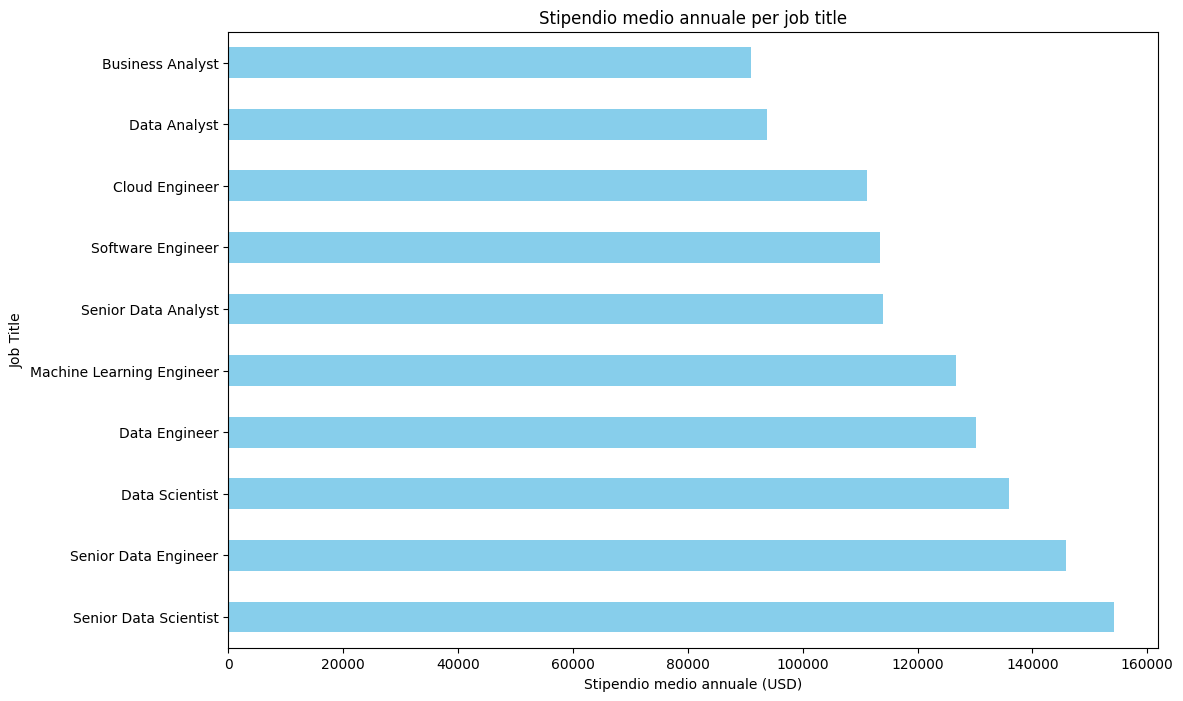

In [5]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#print(df.head())

salary_by_country = df.groupby('job_country')['salary_year_avg'].mean()

job_count_by_country = df.groupby('job_country')['job_title_short'].count()

salary_range_by_country = df.groupby('job_country').agg({'salary_year_avg': ['min', 'max']})

summary = pd.DataFrame({
    'avg_salary': salary_by_country,
    'job_count': job_count_by_country
})

summary = summary.join(salary_range_by_country['salary_year_avg'])

print(summary)

plt.figure(figsize=(12, 8))
avg_salary_by_job = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)
avg_salary_by_job.plot(kind='barh', color='skyblue')
plt.title("Stipendio medio annuale per job title")
plt.xlabel('Stipendio medio annuale (USD)')
plt.ylabel('Job Title')
plt.show()

#print(df.head())

IndexError: index 0 is out of bounds for axis 0 with size 0

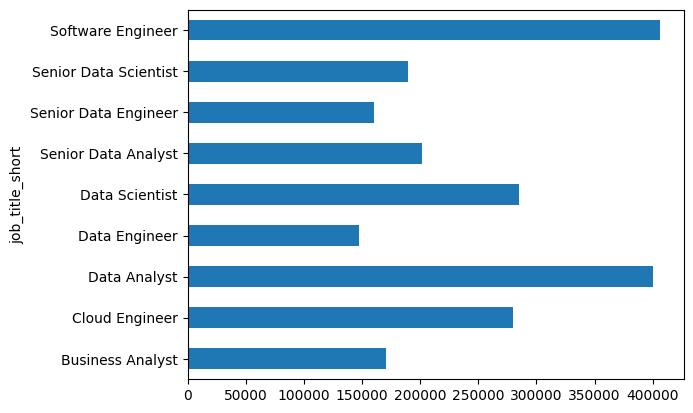

In [6]:
#uni version
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.sort_values('salary_year_avg').head(10)

paesi = df['job_country'].unique()
for paese in paesi:
    dati_paese = df[df['job_country'] == paese]
    dati_lavoro = dati_paese.groupby('job_title_short')['salary_year_avg'].mean()
    dati_lavoro.plot(kind='barh')
plt.title('Salario medio per lavoro in {}'.format(paese))
plt.xlabel('Lavoro')
plt.ylabel('Stipednio medio')
    